<a href="https://colab.research.google.com/github/mtds20/mtds20.ML/blob/main/HW1_U93384434.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import ConcatDataset, DataLoader
import numpy as np
print("GPU:",torch.cuda.get_device_name(0))

import time

import torchvision
import torchvision.models as models
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

!pip install nvidia-ml-py
import psutil
import pynvml

!pip install thop
from thop import profile
from thop import clever_format

import warnings
warnings.filterwarnings('ignore')

GPU: Tesla T4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


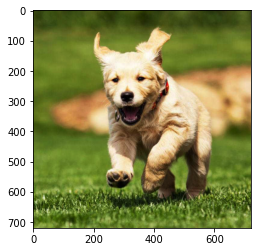

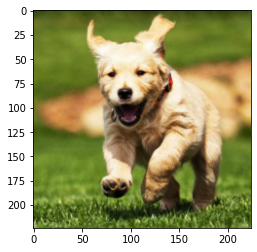

In [ ]:
imgPath = "/content/dog.jpg"

img = Image.open(imgPath)
img = img.convert('RGB')


figure = plt.figure()
plt.imshow(img)
plt.show()

transform = torchvision.transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor()])

img = transform(img)

imagePrint = img.transpose(0,1)
imagePrint = imagePrint.transpose(1,2)
plt.imshow(imagePrint)
plt.show()

img = torch.reshape(img,(1,3,224,224))



In [ ]:
from torchvision.models.resnet import resnet18
alexNet = models.alexnet(pretrained = True)
print(alexNet)

denseNet = models.densenet121(pretrained = True)
print(denseNet)

VGG16 = models.vgg16(pretrained = True)
print(VGG16)

resNet18 = models.resnet18(pretrained = True)
print(resnet18)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
output1 = alexNet(img)
print(output1.shape)

output2 = denseNet(img)
print(output2.shape)

output3 = VGG16(img)
print(output3.shape)

output4 = resNet18(img)
print(output4.shape)

torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])


In [ ]:
macs, params = profile(alexNet, inputs=(img, ))
print("\nAlexNet: \nMACS ", macs, "\nParams: ", params)
readMacs, readParams = clever_format([macs, params], "%.3f")
print("Read MACS: ", readMacs, "\nRead Params: ", readParams, "\n")

macs1, params1 = profile(denseNet, inputs=(img, ))
print("\nDenseNet: \nMACS ", macs1, "\nParams: ", params1)
readMacs1, readParams1 = clever_format([macs1, params1], "%.3f")
print("Read MACS: ", readMacs1, "\nRead Params: ", readParams1, "\n")

macs2, params2 = profile(VGG16, inputs=(img, ))
print("\nVGG16: \nMACS ", macs2, "\nParams: ", params2)
readMacs2, readParams2 = clever_format([macs2, params2], "%.3f")
print("Read MACS: ", readMacs2, "\nRead Params: ", readParams2, "\n")

macs3, params3 = profile(resNet18, inputs=(img, ))
print("\nResNet18: \nMACS ", macs3, "\nParams: ", params3)
readMacs3, readParams3 = clever_format([macs3, params3], "%.3f")
print("Read MACS: ", readMacs3, "\nRead Params: ", readParams3, "\n")

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.

AlexNet: 
MACS  714206912.0 
Params:  61100840.0
Read MACS:  714.207M 
Read Params:  61.101M 

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_avgpool()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
alexNet.to(device)

device1 = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
denseNet.to(device1)

device2 = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
VGG16.to(device2)

device3 = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
resNet18.to(device3)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def get_gpu_info():
 UNIT = 1024 * 1024
 pynvml.nvmlInit()
 gpuDeriveInfo = pynvml.nvmlSystemGetDriverVersion()

 gpuDeviceCount = pynvml.nvmlDeviceGetCount()
 print("Number of GPU：", gpuDeviceCount )

 handle = pynvml.nvmlDeviceGetHandleByIndex(0)
 memoryInfo = pynvml.nvmlDeviceGetMemoryInfo(handle)
 gpuTemperature = pynvml.nvmlDeviceGetTemperature(handle, 0)
 gpuEnergyUsage = pynvml.nvmlDeviceGetTotalEnergyConsumption(handle)
 gpuPowerState = pynvml.nvmlDeviceGetPowerState(handle)
 gpuUtilRate = pynvml.nvmlDeviceGetUtilizationRates(handle).gpu
 gpuMemoryRate = pynvml.nvmlDeviceGetUtilizationRates(handle).memory
 print("memoryInfo.total:", memoryInfo.total/UNIT, "MB")
 print("memoryInfo.used:", memoryInfo.used/UNIT, "MB")
 print("memoryInfo.free:", memoryInfo.free/UNIT, "MB")
 print("memoryInfo.free:", memoryInfo.free/memoryInfo.total)
 print("gpuTemperature:", gpuTemperature, "T")
 print("gpuEnergyUsage:", gpuEnergyUsage)
 print("gpuPowerState", gpuPowerState)
 print("gpuUtilRate:", gpuUtilRate)
 print("gpuMemoryRate:", gpuMemoryRate)
 print("memoryInfo.used:", memoryInfo.used/memoryInfo.total)

def get_current_energy():
  pynvml.nvmlInit()
  handle = pynvml.nvmlDeviceGetHandleByIndex(0)
  gpuEnergyUsage = pynvml.nvmlDeviceGetTotalEnergyConsumption(handle)
  return gpuEnergyUsage

get_gpu_info()

get_current_energy()

Number of GPU： 1
memoryInfo.total: 15360.0 MB
memoryInfo.used: 1872.125 MB
memoryInfo.free: 13487.875 MB
memoryInfo.free: 0.8781168619791667
gpuTemperature: 77 T
gpuEnergyUsage: 75282123
gpuPowerState 0
gpuUtilRate: 0
gpuMemoryRate: 0
memoryInfo.used: 0.12188313802083334


75282123

In [ ]:
repeat = 2500

def print_res(macs,time_beg,time_end,energy_beg,energy_end):
  Total_Energy = energy_end-energy_beg
  Total_Time = time_end-time_beg
  print("Energy",Total_Energy)
  print("Time",Total_Time)
  print("GOPS/W",(repeat*macs/(1024**3))/(Total_Energy*(10**-3)))
  print("GOPs",(repeat*macs/(1024**3))/Total_Time)

In [ ]:
# Float 64
alexNet.type(torch.double)
img = img.type(torch.double)
img = img.to(device)
alexNet.eval()

energy_beg = get_current_energy()
time_beg = time.time()
for i in range(repeat):
  output1 = alexNet(img)
time_end = time.time()
energy_end = get_current_energy()

print("AlexNet: \n")
print_res(macs,time_beg,time_end,energy_beg,energy_end)

# Float 64
denseNet.type(torch.double)
img = img.type(torch.double)
img = img.to(device1)
denseNet.eval()

energy_beg = get_current_energy()
time_beg = time.time()
for i in range(repeat):
  output2 = denseNet(img)
time_end = time.time()
energy_end = get_current_energy()

print("\nDenseNet: \n")
print_res(macs1,time_beg,time_end,energy_beg,energy_end)

# Float 64
VGG16.type(torch.double)
img = img.type(torch.double)
img = img.to(device2)
VGG16.eval()

energy_beg = get_current_energy()
time_beg = time.time()
for i in range(repeat):
  output3 = VGG16(img)
time_end = time.time()
energy_end = get_current_energy()

print("\nVGG16: \n")
print_res(macs2,time_beg,time_end,energy_beg,energy_end)

# Float 64
resNet18.type(torch.double)
img = img.type(torch.double)
img = img.to(device3)
resNet18.eval()

energy_beg = get_current_energy()
time_beg = time.time()
for i in range(repeat):
  output4 = resNet18(img)
time_end = time.time()
energy_end = get_current_energy()

print("\nResNet18: \n")
print_res(macs3,time_beg,time_end,energy_beg,energy_end)


AlexNet: 

Energy 5726078
Time 87.24027729034424
GOPS/W 0.2904068980950008
GOPs 19.061064474792484

DenseNet: 

Energy 30031102
Time 572.037966966629
GOPS/W 0.22460448793858875
GOPs 11.791385670970714

VGG16: 

Energy 41976694
Time 646.6620833873749
GOPS/W 0.8580864614139144
GOPs 55.70085790036585

ResNet18: 

Energy 5824460
Time 97.15729141235352
GOPS/W 0.7291507913828381
GOPs 43.7116922120957


In [ ]:
from torchvision.io import read_image
from torchvision.models import alexnet, AlexNet_Weights

img = read_image("/content/dog.jpg")

# Step 1: Initialize model with the best available weights
weights = AlexNet_Weights.DEFAULT
model = alexnet(weights = weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

Chihuahua: 22.0%


In [ ]:
from torchvision.io import read_image
from torchvision.models import densenet121, DenseNet121_Weights

img = read_image("/content/dog.jpg")

# Step 1: Initialize model with the best available weights
weights = DenseNet121_Weights.DEFAULT
model = densenet121(weights = weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

golden retriever: 33.8%


In [ ]:
from torchvision.io import read_image
from torchvision.models import vgg16, VGG16_Weights

img = read_image("/content/dog.jpg")

# Step 1: Initialize model with the best available weights
weights = VGG16_Weights.DEFAULT
model = vgg16(weights = weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

golden retriever: 37.4%


In [ ]:
from torchvision.io import read_image
from torchvision.models import resnet18, ResNet18_Weights

img = read_image("/content/dog.jpg")

# Step 1: Initialize model with the best available weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights = weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

golden retriever: 59.4%
